# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv('merged_data.csv', chunksize=1_000_000)

header = True
chunk_count = 0
total_lines = 0

for chunk in df:
  chunk = chunk.drop(['Unnamed: 0', 'url', 'track_id', 'album', 'af_instrumentalness', 'af_time_signature', 'trend'], axis=1)
  brazil_df = chunk.loc[chunk['region'] == 'Brazil']

  brazil_df.to_csv('brazilian_data.csv', mode='a', header=header, index=False)

  header = False
  total_lines += brazil_df.shape[0]

  print(f'Chunk {chunk_count} \t {brazil_df.shape[0]} rows \t Total {total_lines}')

  chunk_count += 1

In [6]:
import pandas as pd

dtype = {
    'title': 'object',
    'rank': 'int64',
    'date': 'object',
    'artist': 'object',
    'region': 'object',
    'chart': 'object',
    'streams': 'float64',
    'popularity': 'float64',
    'duration_ms': 'float64',
    'explicit': 'object',
    'release_date': 'object',
    'available_markets': 'object',
    'af_danceability': 'float64',
    'af_energy': 'float64',
    'af_key': 'float64',
    'af_loudness': 'float64',
    'af_mode': 'float64',
    'af_speechiness': 'float64',
    'af_acousticness': 'float64',
    'af_liveness': 'float64',
    'af_valence': 'float64',
    'af_tempo': 'float64'
}

original_df = pd.read_csv('brazilian_data.csv', dtype=dtype)
original_df

,title,rank,date,artist,region,chart,streams,popularity,duration_ms,explicit,...,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_liveness,af_valence,af_tempo
0,Sugar,126,2017-01-02,Maroon 5,Brazil,top200,37128.0,59.0,235493.0,True,...,0.748,0.788,1.0,-7.055,1.0,0.0334,0.0591,0.0863,0.884,120.076
1,Deu Onda,1,2017-01-01,MC G15,Brazil,top200,612271.0,0.0,144039.0,True,...,0.931,0.604,0.0,-1.410,0.0,0.0573,0.4560,0.0488,0.864,129.926
2,Hear Me Now,2,2017-01-01,"Alok, Bruno Martini, Zeeba",Brazil,top200,269574.0,49.0,192846.0,False,...,0.788,0.430,11.0,-7.757,1.0,0.0419,0.5370,0.0936,0.461,121.996
3,10% - Ao Vivo,3,2017-01-01,Maiara & Maraisa,Brazil,top200,228307.0,60.0,174653.0,False,...,0.632,0.950,7.0,-2.850,0.0,0.1110,0.4820,0.8400,0.596,154.006
4,Eu Sei de Cor - Ao Vivo | Acústico,4,2017-01-01,Marília Mendonça,Brazil,top200,217394.0,49.0,174663.0,False,...,0.855,0.601,6.0,-5.902,0.0,0.0346,0.4240,0.2410,0.776,124.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454436,MT- AI CALICA QUER DA PROS AMIGO DA BOCA,46,2021-07-31,"Mc Cyclope, Dj JT Da Serra",Brazil,viral50,NaN,44.0,86099.0,True,...,0.675,0.795,1.0,-0.107,1.0,0.0502,0.1950,0.1480,0.906,125.911
454437,Trajadão,47,2021-07-31,DomLaike,Brazil,viral50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454438,"Não, Não Vou",48,2021-07-31,Mari Fernandez,Brazil,viral50,NaN,0.0,173037.0,False,...,0.631,0.861,11.0,-1.891,0.0,0.0424,0.4270,0.2150,0.822,149.950
454439,Need To Know,49,2021-07-31,Doja Cat,Brazil,viral50,NaN,79.0,210560.0,True,...,0.664,0.609,1.0,-6.509,1.0,0.0707,0.3040,0.0926,0.194,130.041


In [7]:
display(original_df.columns)

drop_columns = ['region', 'chart', 'streams']
df = original_df.drop(drop_columns, axis=1)

df.columns

Index(['title', 'rank', 'date', 'artist', 'region', 'chart', 'streams',
       'popularity', 'duration_ms', 'explicit', 'release_date',
       'available_markets', 'af_danceability', 'af_energy', 'af_key',
       'af_loudness', 'af_mode', 'af_speechiness', 'af_acousticness',
       'af_liveness', 'af_valence', 'af_tempo'],
      dtype='object')

Index(['title', 'rank', 'date', 'artist', 'popularity', 'duration_ms',
       'explicit', 'release_date', 'available_markets', 'af_danceability',
       'af_energy', 'af_key', 'af_loudness', 'af_mode', 'af_speechiness',
       'af_acousticness', 'af_liveness', 'af_valence', 'af_tempo'],
      dtype='object')

In [8]:
# convert release_date (YYYY-MM-DD) to month (MM)
df['release_month'] = df['release_date'].str.split('-').str[1]
df.drop('release_date', axis=1, inplace=True)
df['release_month']

0          05
1          12
2          01
3          03
4          09
         ... 
454436     07
454437    NaN
454438     04
454439     06
454440     03
Name: release_month, Length: 454441, dtype: object

In [9]:
# Drop duplicates based on 'title' and 'artist'
df = df.drop_duplicates(subset=['title', 'artist'])

# Find highest rank and highest popularity using groupby and aggregate functions
grouped = original_df.groupby(['title', 'artist']).agg({'rank': 'min', 'popularity': 'sum'}).reset_index()

# Merge back with df on 'title' and 'artist' to get the corresponding highest rank and highest popularity
df = df.merge(grouped, on=['title', 'artist'], how='left', suffixes=('', '_highest'))

# Drop unnecessary columns
df.drop(columns=['rank_highest', 'popularity_highest'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

df.drop(drop_columns, axis=1, inplace=True, errors='ignore')

df

,title,rank,date,artist,popularity,duration_ms,explicit,available_markets,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_liveness,af_valence,af_tempo,release_month
0,Sugar,126,2017-01-02,Maroon 5,59.0,235493.0,True,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CL...",0.748,0.788,1.0,-7.055,1.0,0.0334,0.0591,0.0863,0.884,120.076,05
1,Deu Onda,1,2017-01-01,MC G15,0.0,144039.0,True,[],0.931,0.604,0.0,-1.410,0.0,0.0573,0.4560,0.0488,0.864,129.926,12
2,Hear Me Now,2,2017-01-01,"Alok, Bruno Martini, Zeeba",49.0,192846.0,False,"['DK', 'EE', 'FI', 'IS', 'LT', 'LV', 'NO', 'SE']",0.788,0.430,11.0,-7.757,1.0,0.0419,0.5370,0.0936,0.461,121.996,01
3,10% - Ao Vivo,3,2017-01-01,Maiara & Maraisa,60.0,174653.0,False,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",0.632,0.950,7.0,-2.850,0.0,0.1110,0.4820,0.8400,0.596,154.006,03
4,Eu Sei de Cor - Ao Vivo | Acústico,4,2017-01-01,Marília Mendonça,49.0,174663.0,False,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",0.855,0.601,6.0,-5.902,0.0,0.0346,0.4240,0.2410,0.776,124.016,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,BALANÇA A GLOCK,22,2021-07-19,"DJ LG, Mc Jajau",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8414,Amiga Vagabunda,42,2021-07-19,Kamilla Maria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8415,PTT (Paint The Town),45,2021-07-19,LOONA,60.0,201120.0,False,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",0.781,0.814,8.0,-2.437,1.0,0.1000,0.0735,0.0565,0.546,124.028,06
8416,ELE TE BOTA SOCA SOCA,28,2021-07-24,"Mc Rd, DJ WIZARD, DJ NpcSize",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def factorize(df, column):
  df.loc[:, column] = pd.factorize(df[column])[0]

In [11]:
df_for_corr = df.copy()

for column in df_for_corr.columns:
  factorize(df_for_corr, column)

corr = df_for_corr.corr()
corr

,title,rank,date,artist,popularity,duration_ms,explicit,available_markets,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_liveness,af_valence,af_tempo,release_month
title,1.000000,-0.288530,0.750788,0.718575,-0.058551,0.563238,-0.339011,0.038303,-0.043112,-0.041960,-0.171288,0.398417,-0.239267,-0.011203,0.117621,0.024865,-0.012326,0.516513,-0.209112
rank,-0.288530,1.000000,-0.090611,-0.347101,0.059434,-0.134314,0.147434,-0.005477,0.019052,0.020071,0.071376,-0.109883,0.112445,0.035117,-0.050417,0.036396,0.013012,-0.101385,0.112096
date,0.750788,-0.090611,1.000000,0.533098,-0.046876,0.430982,-0.295732,-0.000897,-0.072914,-0.054119,-0.146578,0.305028,-0.210573,-0.033331,0.067957,0.017480,-0.032202,0.388937,-0.127775
artist,0.718575,-0.347101,0.533098,1.000000,-0.073858,0.346352,-0.350610,0.016250,-0.072147,-0.073620,-0.162410,0.254533,-0.233228,-0.051213,0.032315,-0.033899,-0.064351,0.314291,-0.235961
popularity,-0.058551,0.059434,-0.046876,-0.073858,1.000000,0.151074,0.229574,0.192092,0.125178,0.114226,0.105048,0.159641,0.172916,0.117643,0.116963,0.094391,0.098650,0.158187,0.122170
duration_ms,0.563238,-0.134314,0.430982,0.346352,0.151074,1.000000,0.288814,0.119984,0.261301,0.274084,0.182773,0.699045,0.260472,0.290318,0.397332,0.284183,0.301893,0.814165,0.150865
explicit,-0.339011,0.147434,-0.295732,-0.350610,0.229574,0.288814,1.000000,0.081570,0.262235,0.273853,0.341026,0.273217,0.439611,0.218649,0.260053,0.258668,0.279990,0.287632,0.324574
available_markets,0.038303,-0.005477,-0.000897,0.016250,0.192092,0.119984,0.081570,1.000000,0.070474,0.085394,0.061428,0.109477,0.063453,0.055141,0.124059,0.050910,0.087217,0.123217,0.018927
af_danceability,-0.043112,0.019052,-0.072914,-0.072147,0.125178,0.261301,0.262235,0.070474,1.000000,0.259824,0.180718,0.254558,0.221507,0.197669,0.220337,0.160732,0.242074,0.260647,0.146961
af_energy,-0.041960,0.020071,-0.054119,-0.073620,0.114226,0.274084,0.273853,0.085394,0.259824,1.000000,0.166718,0.301459,0.232265,0.201711,0.243410,0.128869,0.263694,0.278030,0.155448


<Axes: >

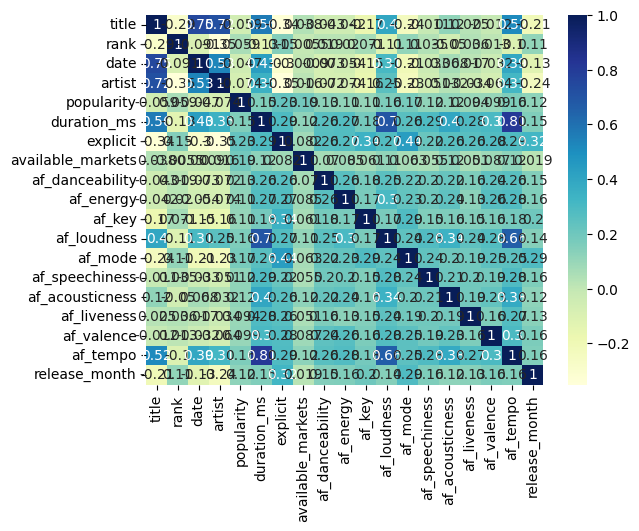

In [12]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap='YlGnBu')

<Axes: >

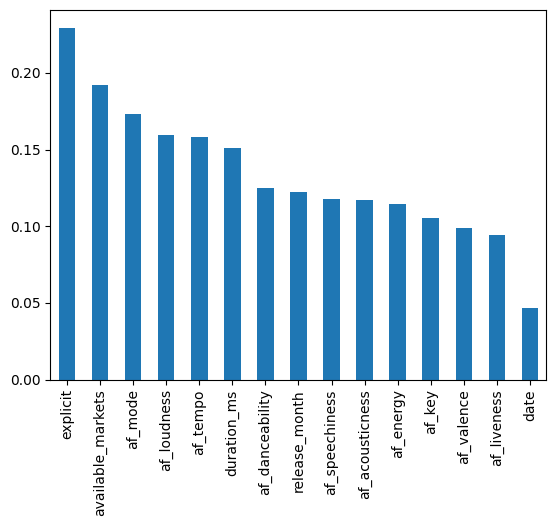

In [13]:
populatiry_corr = corr.drop(['artist', 'title', 'popularity', 'rank'], axis=0)
populatiry_corr = populatiry_corr['popularity'].abs().sort_values(ascending=False)
populatiry_corr.plot(kind='bar')

In [14]:
def select_features(corr, corr_treshold, mandatory_features=[]):
    features = mandatory_features

    for column in corr.index:
        if corr[column] >= corr_treshold and features.count(column) == 0:
            features.append(column)

    # print('selected features: ', features)

    return features

In [15]:
df.columns

Index(['title', 'rank', 'date', 'artist', 'popularity', 'duration_ms',
       'explicit', 'available_markets', 'af_danceability', 'af_energy',
       'af_key', 'af_loudness', 'af_mode', 'af_speechiness', 'af_acousticness',
       'af_liveness', 'af_valence', 'af_tempo', 'release_month'],
      dtype='object')

In [99]:
results = {}

# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

df_clean = df.dropna()

def get_parameters():
  features = ['af_danceability', 'af_energy',
       'af_key', 'af_loudness', 'af_mode', 'af_speechiness', 'af_acousticness',
       'af_liveness', 'af_valence', 'af_tempo', 'release_month', 'duration_ms', 'explicit', 'available_markets']

  X = df_clean[features]
  y = df_clean['popularity']

  for column in X.columns:
    factorize(X, column)

  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

  return train_X, val_X, train_y, val_y, features

train_X, val_X, train_y, val_y, features = get_parameters()

criteria = ['squared_error', 'absolute_error']

for criterion in criteria:
  tree_model = DecisionTreeRegressor(random_state=0, criterion=criterion)
  tree_model.fit(train_X, train_y)
  tree_predictions = tree_model.predict(val_X)

  mae = mean_absolute_error(val_y, tree_predictions)
  mse = mean_squared_error(val_y, tree_predictions)

  results[f'DecisionTreeRegressor_{criterion}'] = (mae, mse)

results

{'DecisionTreeRegressor_squared_error': (12.90523045054376, 401.0502330398757),
 'DecisionTreeRegressor_absolute_error': (12.467115484205076,
  375.819782496116)}

# Neural Network

In [106]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the features and target variable
features = ['af_danceability', 'af_energy', 'af_key', 'af_loudness', 'af_mode', 'af_speechiness', 'af_acousticness', 'af_liveness', 'af_valence', 'af_tempo', 'release_month', 'duration_ms', 'explicit', 'available_markets']
target = 'popularity'

# Convert categorical variables to numerical
df_clean['explicit'], _ = pd.factorize(df_clean['explicit'])
df_clean['available_markets'], _ = pd.factorize(df_clean['available_markets'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_clean[features], df_clean[target], test_size=0.2, random_state=0)

activation_functions = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'adam']

for activation in activation_functions:
    for solver in solvers:
        regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation=activation, solver=solver, random_state=0)
        regressor.fit(X_train, y_train)
        predictions = regressor.predict(X_test)

        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)

        results[f'NeuralNetwork_{activation}_{solver}'] = (mae, mse)

results

/tmp/ipykernel_10189/2807909398.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['explicit'], _ = pd.factorize(df_clean['explicit'])
/tmp/ipykernel_10189/2807909398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['available_markets'], _ = pd.factorize(df_clean['available_markets'])


{'DecisionTreeRegressor_squared_error': (12.90523045054376, 401.0502330398757),
 'DecisionTreeRegressor_absolute_error': (12.467115484205076,
  375.819782496116),
 'NeuralNetwork_identity_lbfgs': (24.756808348990024, 754.9570375800765),
 'NeuralNetwork_identity_adam': (27.158210595895625, 1096.0406083469834),
 'NeuralNetwork_logistic_lbfgs': (25.099660721399754, 760.7515970923989),
 'NeuralNetwork_logistic_adam': (25.099376161300064, 760.923618192842),
 'NeuralNetwork_tanh_lbfgs': (25.082387119662325, 760.2455363845576),
 'NeuralNetwork_tanh_adam': (25.080130894444142, 760.8866752110572),
 'NeuralNetwork_relu_lbfgs': (24.717990444634637, 753.7832306791163),
 'NeuralNetwork_relu_adam': (25.660669336079792, 829.1952128152805),
 'LinearRegression': (23.997600949187934, 706.6824248646446)}

# Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression

# Crie o modelo de regressão linear
linear_model = LinearRegression()

# Treine o modelo usando os dados de treinamento
linear_model.fit(X_train, y_train)

# Faça as previsões usando os dados de teste
linear_predictions = linear_model.predict(X_test)

# Calcule o erro médio absoluto
linear_error = mean_absolute_error(y_test, linear_predictions)
mse = mean_squared_error(y_test, linear_predictions)

results['LinearRegression'] = (linear_error, mse)

results

{'DecisionTreeRegressor_squared_error': (12.90523045054376, 401.0502330398757),
 'DecisionTreeRegressor_absolute_error': (12.467115484205076,
  375.819782496116),
 'NeuralNetwork_identity_lbfgs': (24.756808348990024, 754.9570375800765),
 'NeuralNetwork_identity_adam': (27.158210595895625, 1096.0406083469834),
 'NeuralNetwork_logistic_lbfgs': (25.099660721399754, 760.7515970923989),
 'NeuralNetwork_logistic_adam': (25.099376161300064, 760.923618192842),
 'NeuralNetwork_tanh_lbfgs': (25.082387119662325, 760.2455363845576),
 'NeuralNetwork_tanh_adam': (25.080130894444142, 760.8866752110572),
 'NeuralNetwork_relu_lbfgs': (24.717990444634637, 753.7832306791163),
 'NeuralNetwork_relu_adam': (25.660669336079792, 829.1952128152805),
 'LinearRegression': (23.997600949187934, 706.6824248646446)}

In [103]:
results_table = pd.DataFrame(results.items(), columns=['Model', 'Error'])
results_table[['MAE', 'MSE']] = results_table['Error'].apply(pd.Series)
results_table.drop('Error', axis=1, inplace=True)
results_table.set_index('Model', inplace=True)

results_table

,MAE,MSE
Model,,
DecisionTreeRegressor_squared_error,12.905230,401.050233
DecisionTreeRegressor_absolute_error,12.467115,375.819782
NeuralNetwork_identity_lbfgs,24.756808,754.957038
NeuralNetwork_identity_adam,27.158211,1096.040608
NeuralNetwork_logistic_lbfgs,25.099661,760.751597
NeuralNetwork_logistic_adam,25.099376,760.923618
NeuralNetwork_tanh_lbfgs,25.082387,760.245536
NeuralNetwork_tanh_adam,25.080131,760.886675
NeuralNetwork_relu_lbfgs,24.717990,753.783231
